# Exercise 1

**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

# Problem Overview

In this problem we will find eigenvalues of the 1D Schrödinger equation using numerical methods.

The time-independent Schrödinger equation in 1D can be written :

\begin{equation}
H \psi = E \psi \tag{1}
\end{equation}

Where the Hamiltonian $H$ is given by 

$$
H = \frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V \tag{2}
$$

In order to find numerical solutions, we can divide the spatial dimension into $N$ discrete points, $x_i$, and evaluate $\psi$ at each one.  Given this, equation \ref{eq1} becomes a matrix equation, with $\psi$ an $N$-dimensional vector, and $H$ an $(N \times N)$ matrix.  We can then find the eigenvalues and eigenfunctions of the equation using numerical methods.

In order to define the matrix $H$, we can use a discrete approximation of the 2nd derivative :
$$
\frac{d^2}{dx^2} \psi(x_i) \rightarrow \frac{\psi_{i-1} - 2\psi_i + \psi_{i+1}}{(\Delta x)^2}
$$

where $(\Delta x)$ is the distance between discrete points $x_i$. We will choose dimensionless units for each problem, where $x$ is measured in terms of a length $a$, and $E$ is therefore measured in units of $\frac{\hbar^2}{2m a^2}$.  We can therefore write the kinetic energy term of the Hamiltonian as a "tri-diagonal" matrix $D$, which has the leading diagonal :

$$D_{i,i} = \frac{2}{(\Delta x)^2}$$

and the diagonals above and below this are :

$$D_{i,i+1} = D_{i,i-1} = \frac{-1}{(\Delta x)^2}$$

The potential term $V \psi$ can be represented by a matrix where the leading diagonal is the potential evaluated at the $i$-th point in space, $V_{i,i} = V(x_i)$, and all other entries are zero.

Given a potential, we construct the Hamiltonian matrix, $H=D+V$, and then use a numerical method to find the eigenvalues and eigenvectors of $H$.

## Part 1

The quantum harmonic oscillator is a good example to start with, since it has exact analytic solutions. The potential is :
$$V(x) = \frac{1}{2}m \omega^2 x^2$$

If we choose to measure $x$ in units of $\sqrt{\frac{\hbar}{m \omega}}$, then $E$ will be measured in units of $\frac{1}{2}\hbar \omega$, and the potential can be written :

$$V(x_i) = i^2 (\Delta x)^2 = x_i^2$$

You should write a function which takes as argument a discrete set of space points, $x_i$, (ie. an array), and returns the potential at each point, $V_i$ (another array).

In [1]:
import numpy as np
import scipy.linalg as linalg
import scipy.constants as const
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import math

def potential_qho(x):
    v = np.square(x)
    return v

Now test your function by plotting the results over a suitable range of $x$.

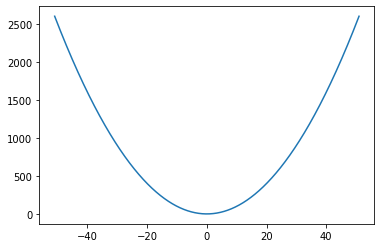

In [2]:
xr=51 #x range (plus and minus)
dx=2*xr/3001
x=np.arange(-xr,xr+dx,dx)
V=potential_qho(x)
plt.figure()
plt.plot(x,V)
plt.show()

# Part 2

Now write a function which, given the discrete space points $x_i$ and the potential $V_i$, constructs and returns the Hamiltonian matrix.

In [3]:
def hamiltonian(x, v):
    v=np.diag(v)
    D = np.full((len(x),len(x)),-1/(np.abs(x[1]-x[0])**2))
    D = np.tril(np.triu(D,-1),1)
    for i in range(0,len(x)):
        D[i][i]=2/(dx**2)
    H=D+v
        
    return H, D

Test your function by printing the matrix it returns.  You can use small $N$ and check a few elements by hand to ensure they are correct.

In [4]:
H,D=hamiltonian(x,V)
print(D)
print(H)



[[1731.257401  -865.6287005    0.        ...    0.           0.
     0.       ]
 [-865.6287005 1731.257401  -865.6287005 ...    0.           0.
     0.       ]
 [   0.        -865.6287005 1731.257401  ...    0.           0.
     0.       ]
 ...
 [   0.           0.           0.        ... 1731.257401  -865.6287005
     0.       ]
 [   0.           0.           0.        ... -865.6287005 1731.257401
  -865.6287005]
 [   0.           0.           0.        ...    0.        -865.6287005
  1731.257401 ]]
[[4332.257401   -865.6287005     0.         ...    0.
     0.            0.        ]
 [-865.6287005  4328.79171184 -865.6287005  ...    0.
     0.            0.        ]
 [   0.         -865.6287005  4325.32833315 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... 4325.32833315
  -865.6287005     0.        ]
 [   0.            0.            0.         ... -865.6287005
  4328.79171184 -865.6287005 ]
 [   0.            0.            0.         ...  

# Part 3

Now find the first 10 eigenvalues of the quantum harmonic oscillator Hamiltonian using an appropriate scipy routine. You should use a large number of $x$ points, at least 1000, covering sufficient range that the wavefunction falls to zero at the extremities. You should compare the computed eigenvalues with the expected eigenvalues.

In [5]:
e_val_vect=linalg.eig(H)#,homogeneous_eigvals=True)
#print(e_val_vect)
#print(e_val_vect[0][0:9])

evals=linalg.eigvals(H)
evects=e_val_vect[1]

sortarr=np.argsort(evals)
evect=evects[:,sortarr]
evals=abs(np.sort(evals))


Next you should plot the wavefunctions, ie. the eigenvectors.  Rather than plot the wavefunction directly, you should plot the probability density, which is given by $\psi^2$, and indicates the probability to find the particle at position $x$.

(3002, 3002)


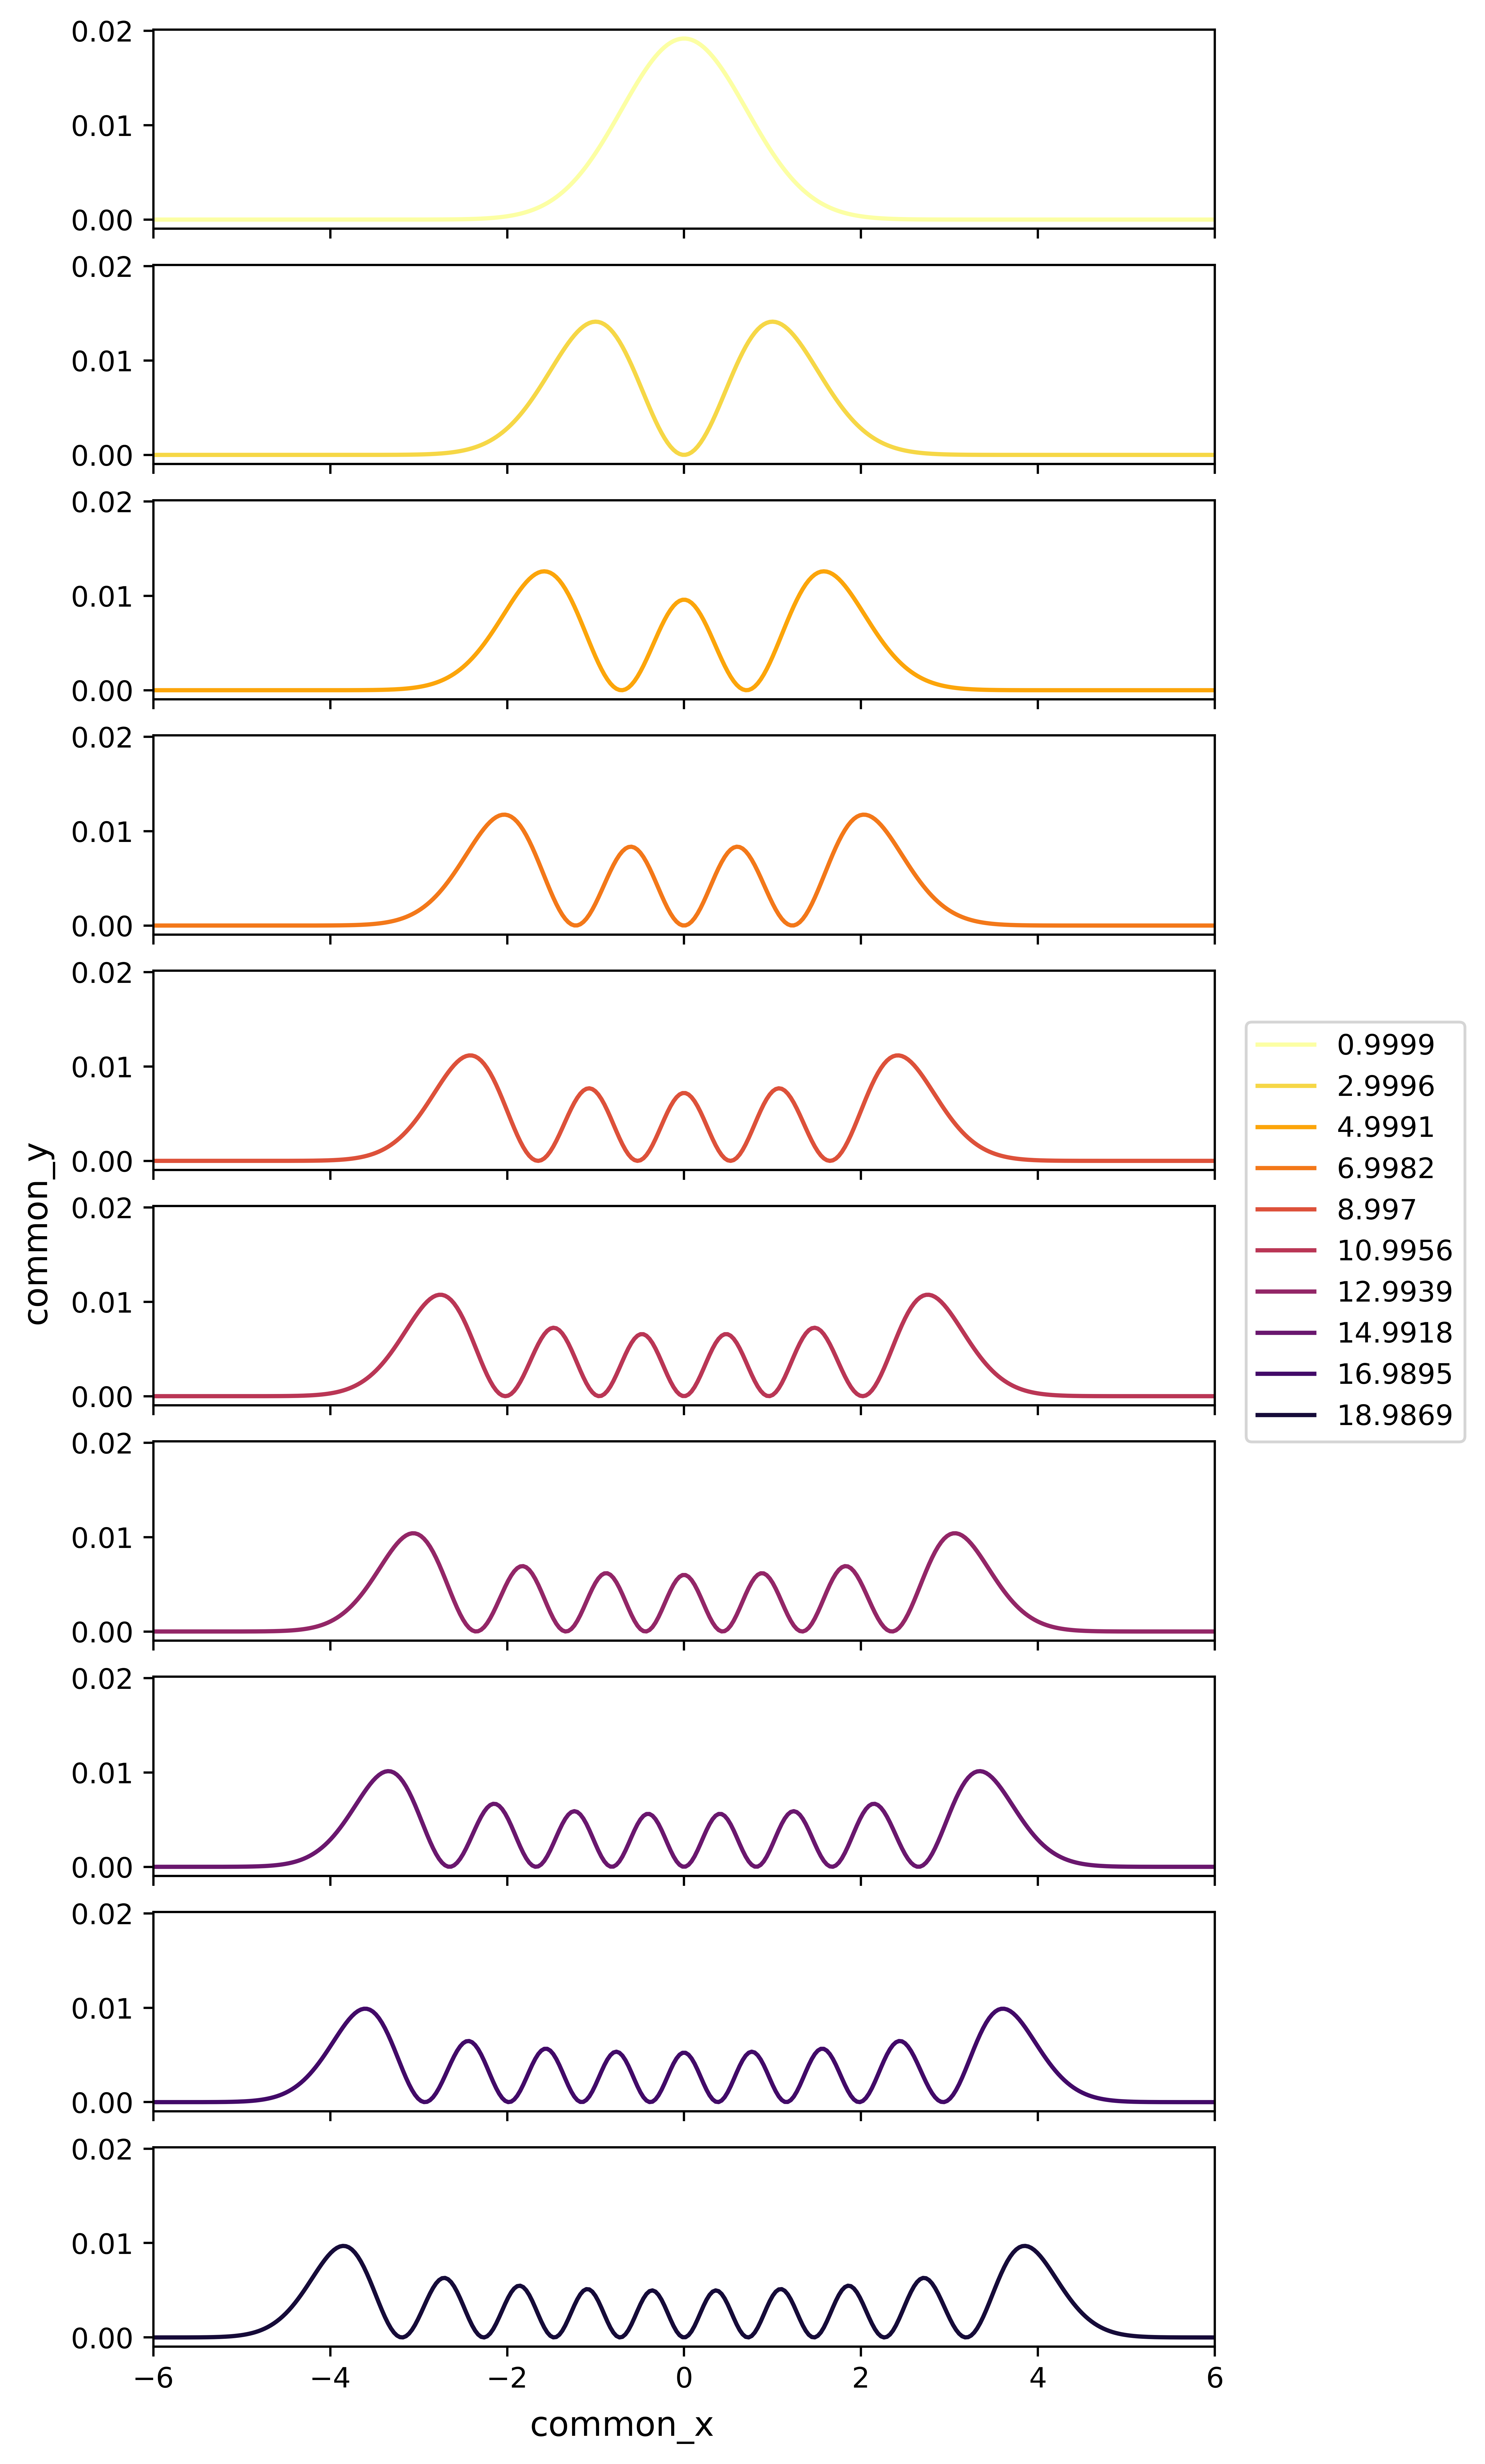

In [6]:
psi2=(np.square(evect))
print(np.shape(psi2))

displaynum=10
cm  = plt.cm.inferno_r
col = [cm(int(x*cm.N/displaynum)) for x in range(displaynum)]


fig,axs=plt.subplots(displaynum,1,dpi=700,sharex=True,sharey=True,constrained_layout=True,figsize=(6,12))
for i in range(0,displaynum):    
    axs[i].plot(x,psi2[:,i],label=str(round(evals[i],4)),color=col[i])#[:,1:7])
    axs[i].set_xlim(-6,6)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.supxlabel('common_x')
fig.supylabel('common_y')
plt.show()

# Part 4

Having verified our method, we can use it to find the eigenvalues of a more complex system - the Hydrogen atom.  In a spherically symmetric system, the wavefunction can be written :

$$\frac{1}{r}\Psi(r)Y_{lm}(\theta, \phi)e^{i m\phi}$$

where $Y_{lm}(\theta, \phi)$ are the spherical harmonic functions and l, m are the angular momentum quantum numbers. The radial function $\Psi(r)$ satisfies the time-independent Schrödinger equation, provided a suitable term is added to the potential.

If we use the Bohr radius $a_0$ as the unit $r$, where :
$$a_0 = \frac{4 \pi \epsilon \hbar^2}{m_e e^2}$$

then the energy will be measured in units of :
$$\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$$

and the potential for the hydrogen atom can be written :

$$V(r_i) = \frac{-2}{r_i} + \frac{l(l+1)}{r_i^2}$$

Write a function which takes as argument a discrete set of points, $r_i$, and returns the potential $V_i$. You should use a range of $r$ such that the wavefunction become negligible - 200 Bohr radii should be sufficient.  Note that $r$ must now be positive.

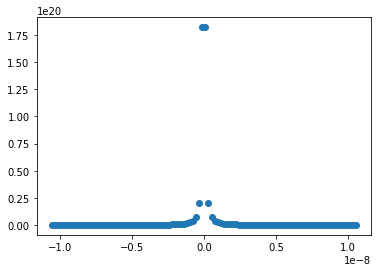

ValueError: 'c' argument has 102 elements, which is inconsistent with 'x' and 'y' with size 1061208.

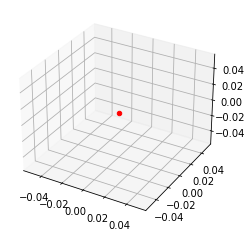

In [89]:

def potential_H(r,l):
    v = (-2/r) + (l*(l+1)/np.square(r))
    return v
    
rr=200*const.physical_constants['Bohr radius'][0] #x range (plus and minus)
dr=2*rr/101
x=np.arange(-rr,rr+dr,dr)
y=x
z=x
xx,yy,zz=np.meshgrid(x,y,z)#,sparse=True)
r=np.sqrt(xx**2 + yy**2 + zz**2)
Vr=potential_H(x,1)
Vx=potential_H(xx,1)
Vy=potential_H(yy,1)
Vz=potential_H(zz,1)

Vrr=potential_H(r,1)
plt.figure()
plt.scatter(x,Vr)
plt.show()

#plt.style.use('_mpl-gallery')
#print(Vrr)
# Make data
X=Vx#Vrr[0,:,:]
Y=Vy#Vrr[1,:,:]
Z=Vz#np.array([V,V])

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(0,0,0,color='red')
ax.scatter(X,Y,Z,c=np.log(Vrr),marker='x',linewidths=0.05,alpha=0.05,cmap='magma_r')#, rstride=100, cstride=100,)

# ax.set(xticklabels=[],
#        yticklabels=[],
#        zticklabels=[])

plt.show()


Now re-use the `hamiltonian()` function to generate the Hamiltonian matrix for the Hydrogren atom, and find at least the first 5 eigenvalues for at least l=0. Compare these eigenvalues with the expected eigenvalues.

In [8]:
HH,HD=hamiltonian(r,Vrr)

e_val_vect=linalg.eig(HH)#,homogeneous_eigvals=True)
#print(e_val_vect)
#print(e_val_vect[0][0:9])

evals=linalg.eigvals(HH)
evects=e_val_vect[1]

sortarr=np.argsort(evals)
evect=evects[:,sortarr]
evals=abs(np.sort(evals))

psi2=(np.square(evect))
print(np.shape(psi2))




ValueError: Input must be 1- or 2-d.

ValueError: shape mismatch: objects cannot be broadcast to a single shape

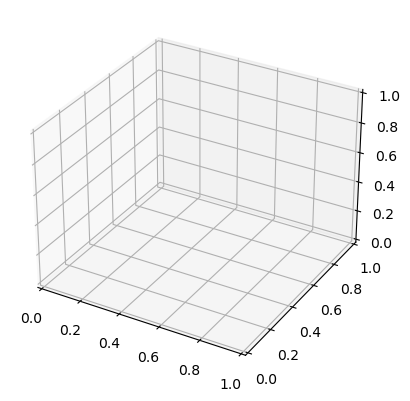

In [ ]:
displaynum=10
cm  = plt.cm.inferno_r
col = [cm(int(x*cm.N/displaynum)) for x in range(displaynum)]


fig,axs=plt.subplots(displaynum,1,dpi=700,sharex=True,sharey=True,constrained_layout=True,figsize=(6,12))
for i in range(0,displaynum):    
    axs[i].plot(r,psi2[:,i],label=str(round(evals[i],4)),color=col[i])#[:,1:7])
    #axs[i].set_xlim(-6,6)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.supxlabel('common_x')
fig.supylabel('common_y')
plt.show()

X=r
Y=r
Z=psi2#np.array([V,V])

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(X, Y, Z)#, rstride=100, cstride=100,)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

Finally, as for the quantum harmonic oscillator, plot the wavefunctions.

# Part 5

In the Markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained. You are not expected to write more than about 250-300 words.